In [1]:
import sys
sys.path.insert(0, "../../../pymc")

import pymc as pm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

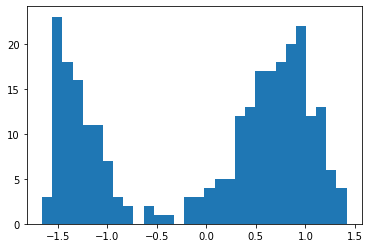

In [2]:
data = pd.read_csv("../../data/old_faithful.tsv", sep="\t")
data = data["eruptions"].values
data = (data - data.mean())/data.std()

_ = plt.hist(data, bins=30)

In [3]:
K = 30

In [6]:
with pm.Model() as model:
    alpha = pm.Gamma("alpha", 1., 1.)
    sbw = pm.StickBreakingWeights("sbw", alpha, K=K)
    
    component = pm.Categorical("component", sbw)
    
    µ = pm.Normal("µ", 0., 5., shape=(K+1), initval=np.arange(-3, 3, step=6/(K+1)))
    σ = pm.Gamma("σ", 1., 1., shape=(K+1))
    λ = pm.Uniform("λ", 0., 5., shape=(K+1))
    
    obs = pm.Normal(
        "obs", 
        µ[component], 
        σ[component]*λ[component], 
        observed=data,
    )
    
    step1 = pm.Metropolis(vars=[alpha, sbw, µ, σ, λ, obs])
    step2 = pm.CategoricalGibbsMetropolis(
        [component]
    )
    trace = pm.sample(draws=20000, chains=1, tune=10000, step=[step1, step2])

ValueError: need at least one array to concatenate

In [ ]:
trace.to_dict()["posterior"]["component"]